In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:



In [2]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

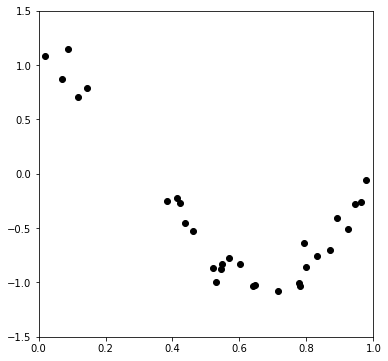

In [3]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.



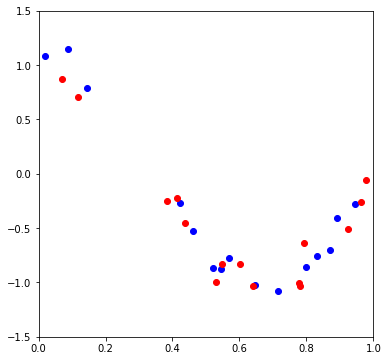

In [31]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics

0.6053646658203213
0.3279908673010542


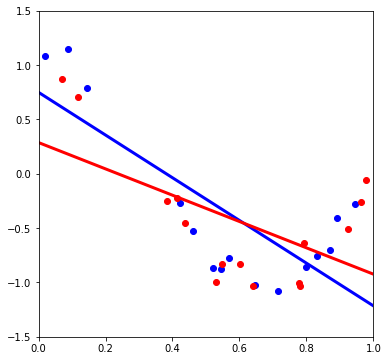

In [32]:
X1=np.vstack(X1)
modelX1 = LinearRegression()
modelX1.fit(X1, y1)

X2=np.vstack(X2)
modelX2 = LinearRegression()
modelX2.fit(X2, y2)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x1_plot = np.vstack(np.linspace(0, 10, 100))
x2_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x1_plot, modelX1.predict(x1_plot), color='blue',linewidth=3)
plt.plot(x2_plot, modelX2.predict(x2_plot), color='red',linewidth=3)
plt.plot()
print(modelX1.score(X1,y1))
print(modelX2.score(X2,y2))
plt.show()

0.9999999999999878
0.9999999999999017


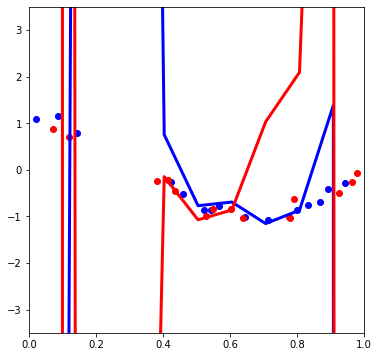

In [35]:
modelX3 = make_pipeline(PolynomialFeatures(20), LinearRegression())
modelX3.fit(X1, y1)

modelX4 = make_pipeline(PolynomialFeatures(20), LinearRegression())
modelX4.fit(X2, y2)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-3.5,3.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x1_plot = np.vstack(np.linspace(0, 10, 100))
x2_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x1_plot, modelX3.predict(x1_plot), color='blue',linewidth=3)
plt.plot(x2_plot, modelX4.predict(x2_plot), color='red',linewidth=3)
plt.plot()
print(modelX3.score(X1,y1))
print(modelX4.score(X2,y2))
plt.show()